# Ejercicios de Seaborn

In [86]:
# 1. Importa pandas, pyplot y seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [87]:
# 2. Activa matplotlib de forma estática

In [88]:
%matplotlib inline


In [ ]:
df = pd.read_csv('Pokemon.csv', index_col=0)

In [90]:
df.head(6)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [91]:
# 4. Mira las primeras filas del dataset para hacerte una idea de los datos cargados

In [92]:
# Mostrar las primeras filas para verificar


In [93]:
# 5. Haz un scatter plot con lmplot(), que es el método que pinta una regresión lineal
# Pasa el DataFrame como argumento del método en el parámetro llamado data

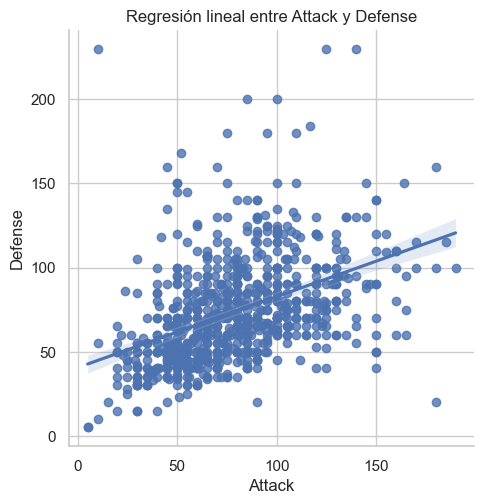

In [ ]:
sns.lmplot(x='Attack', y='Defense', data=df)

In [95]:
# 6. No queremos ver la línea recta de la regresión lineal.
# prueba a añadir fit_reg a falso

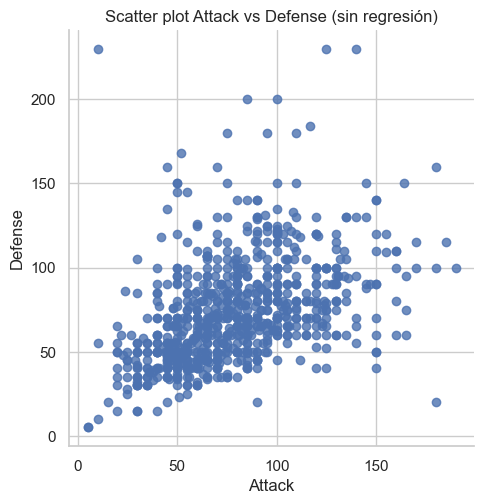

In [ ]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False)

In [97]:
# 7. Vamos a decir qué variable (columna del DataFrame) codifica los colores (hue)
# Que el hue sea el Stage

In [ ]:
def _match_col(df, target):
    tgt = target.strip().lower()
    for c in df.columns:
        if c.strip().lower() == tgt:
            return c
    return None #detectamo0s Stage
hue_col = _match_col(df, "Stage")

if hue_col is None:
    if "Generation" in df.columns:
        hue_col = "Generation"
    elif "Legendary" in df.columns:
        hue_col = "Legendary"

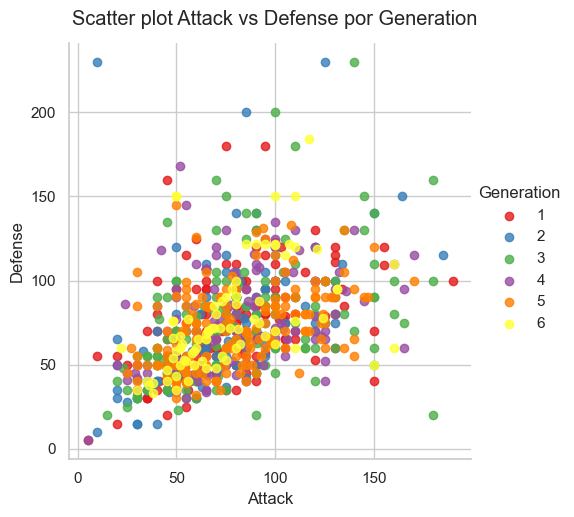

In [ ]:
g = sns.lmplot(
    x="Attack", y="Defense",
    data=df,
    fit_reg=False,
    hue=hue_col,              
    palette="Set1" if hue_col else None


plt.show())

In [99]:
# 8. Limita el eje x entre 20 y 100

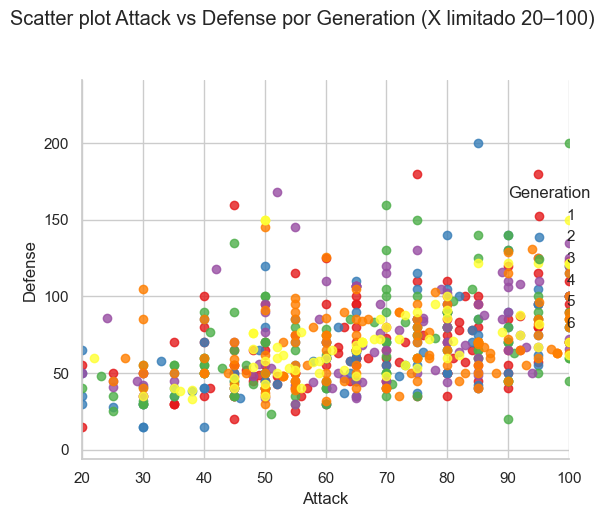

In [ ]:
g.set(xlim=(20, 100)) #Limitar eje X

plt.show()


In [101]:
# 9. Dibuja un diagrama de cajas con el dataframe

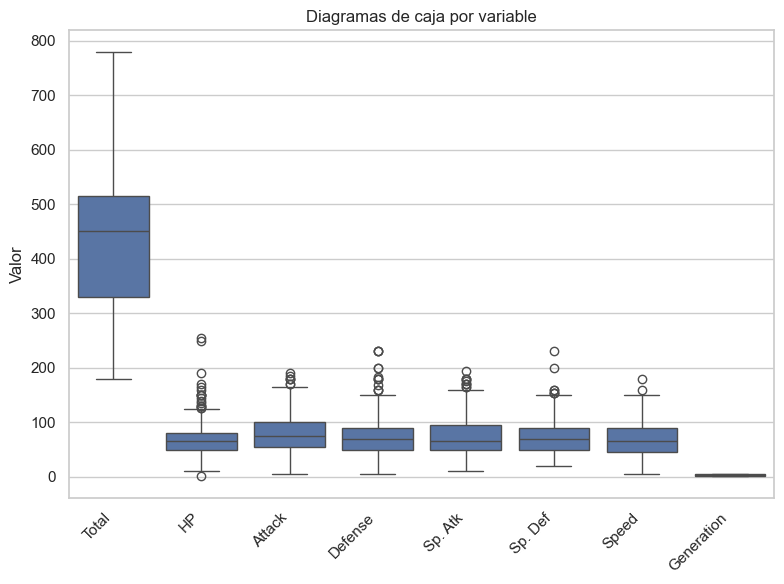

In [ ]:
num_cols = df.select_dtypes(include="number").columns.tolist() #columnas numericas largas
if not num_cols:
    raise ValueError("No hay columnas numéricas en el DataFrame.")

df_long = df[num_cols].melt(var_name="Variable", value_name="Valor")

plt.figure(figsize=(max(8, len(num_cols)*0.9), 6))
sns.boxplot(data=df_long, x="Variable", y="Valor")
plt.title("Diagramas de caja por variable")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [103]:
# 10. No nos interesan las columnas Total, Stage ni Legendary
# Bórralos del DataFrame y vuelve a dibujar el diagrama de cajas

In [ ]:
targets = {"total", "stage", "legendary"}
cols_to_drop = [c for c in df.columns if c.strip().lower() in targets]
df2 = df.drop(columns=cols_to_drop, errors="ignore") #eliminamos cols

In [ ]:
num_cols = df2.select_dtypes(include="number").columns.tolist()
if not num_cols:
    raise ValueError("No quedan columnas numéricas tras eliminar Total/Stage/Legendary.")

df_long = df2[num_cols].melt(var_name="Variable", value_name="Valor") #cols restantes

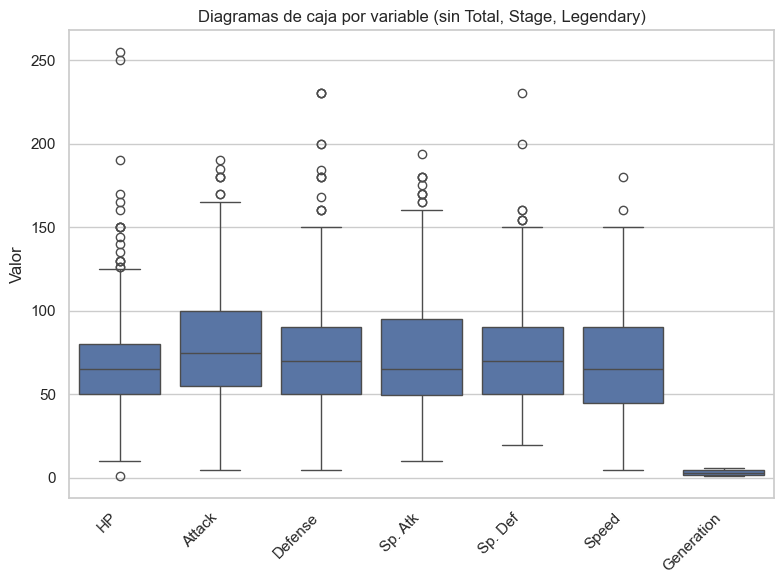

In [ ]:
plt.figure(figsize=(max(8, len(num_cols)*0.9), 6))
sns.boxplot(data=df_long, x="Variable", y="Valor")
plt.title("Diagramas de caja por variable (sin Total, Stage, Legendary)")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


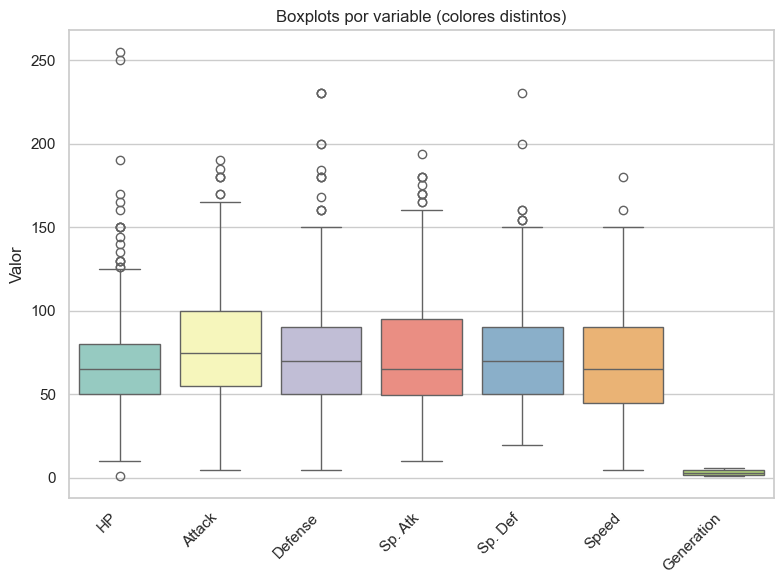

In [ ]:
plt.figure(figsize=(max(8, len(num_cols)*0.9), 6))
sns.boxplot(
    data=df_long, x="Variable", y="Valor",
    hue="Variable",           
    dodge=False,              
    legend=False,         
    palette="Set3"          
plt.title("Boxplots por variable (colores distintos)")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
)

In [106]:
# 11. Mira cuántos 'Type 1' diferentes hay en el DataFrame

In [ ]:
def find_col(df, targets=("type 1", "type1", "type_1")):
    tset = {t.lower() for t in targets}
    for c in df.columns:
        if c.strip().lower() in tset:
            return c
    return None

col = find_col(df)


num_types = df[col].nunique(dropna=True)
unique_types = sorted(df[col].dropna().unique())


In [ ]:
print("Tipos distintos de 'Type 1':", num_types)
print("Listado:", unique_types)

Tipos distintos de 'Type 1': 18
Listado: ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

Frecuencias:
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


In [108]:
# 12. Quédate del Dataframe solo con los 'Type 1' iguales a 'Grass', 'Fire' o 'Water'

In [ ]:
def find_col(df, targets=("type 1", "type1", "type_1")):
    tset = {t.lower() for t in targets}
    for c in df.columns:
        if c.strip().lower() in tset:
            return c
    return None

col = find_col(df)


In [ ]:
permitidos = {"grass", "fire", "water"}

mask = df[col].astype(str).str.strip().str.casefold().isin(permitidos)

df_filtrado = df.loc[mask].copy()

In [ ]:
print(f"Filas seleccionadas: {len(df_filtrado)} de {len(df)}")
print(df_filtrado[col].value_counts())

Filas seleccionadas: 234 de 800
Type 1
Water    112
Grass     70
Fire      52
Name: count, dtype: int64


In [110]:
# 13. Usa un estilo 'whitegrid'

In [ ]:
sns.set_theme(style="whitegrid") 


In [112]:
# 14. Pinta diagramas de violín con el DataFrame

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_33156\3370367550.py:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df_long, x="Variable", y="Valor", inner="box", cut=0, scale="width")


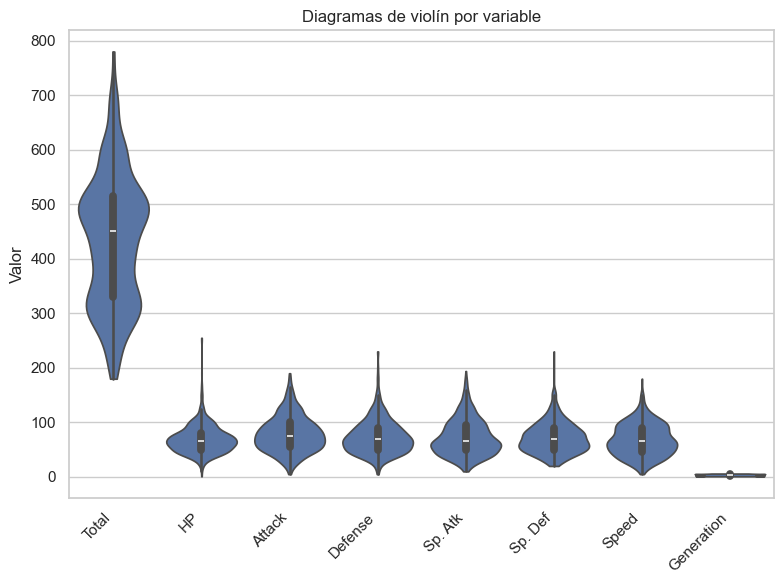

In [ ]:
plt.figure(figsize=(max(8, len(num_cols)*0.9), 6))
sns.violinplot(data=df_long, x="Variable", y="Valor", inner="box", cut=0, scale="width")
plt.title("Diagramas de violín por variable")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [114]:
# 15. Escribe una lista de colores con valores '#78C850', '#F08030',  '#6890F0'

In [ ]:
colors = ['#78C850', '#F08030', '#6890F0']
colors

['#78C850', '#F08030', '#6890F0']

In [116]:
# 16. Pinta de nuevo los diagramas de violín añadiendo esos colores en la paleta (palette)

In [ ]:
sns.set_theme(style="whitegrid")
order = ["Grass", "Fire", "Water"]

fig = plt.figure(figsize=(6.4, 4.8), dpi=100)  # 640x480 px
ax = fig.add_subplot(111)

sns.violinplot(
    data=df_filtered, x="Type 1", y="Attack",
    order=order, inner="box", cut=0, scale="width", ax=ax)

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_33156\100007778.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


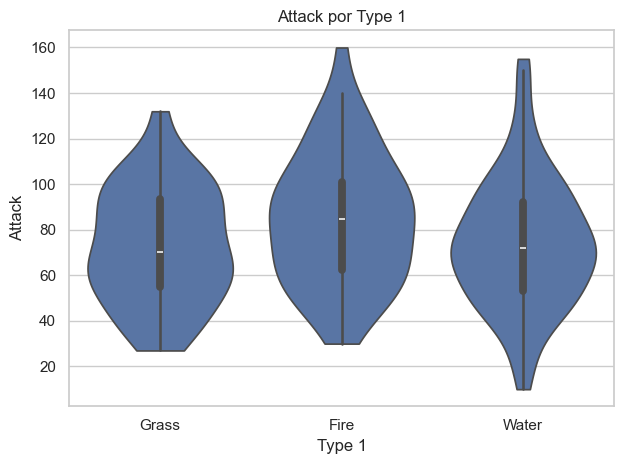

In [ ]:
ax.set_title("Attack por Type 1")
ax.set_xlabel("Type 1"); ax.set_ylabel("Attack")
plt.tight_layout(); plt.show()

In [ ]:
sns.set_theme(style="whitegrid")

order = ["Grass", "Fire", "Water"]
pal = dict(zip(order, ['#78C850', '#F08030', '#6890F0']))

fig = plt.figure(figsize=(6.4, 4.8), dpi=100) 
ax = fig.add_subplot(111)

sns.violinplot(
    data=df_filtered, x=t1, y="Attack",
    order=order, palette=pal,
    inner="box", cut=0, scale="width")

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_33156\3502729394.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_33156\3502729394.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


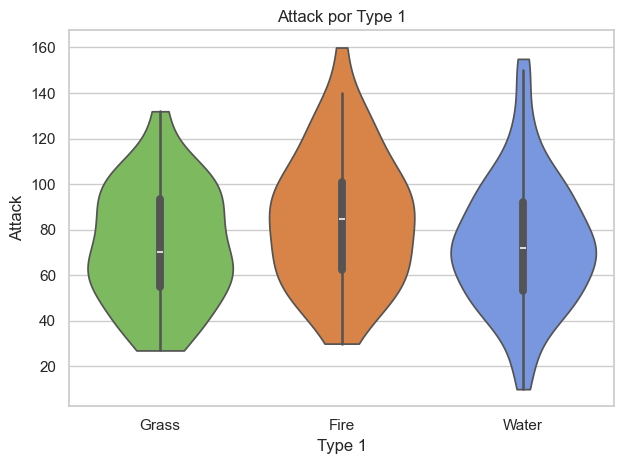

In [ ]:
ax.set_title("Attack por Type 1")
ax.set_xlabel("Type 1"); ax.set_ylabel("Attack")
plt.tight_layout(); plt.show()


In [119]:
# 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si Grass tiene muchos puntos y Fire tiene muy pocos.
# Para ver esto, usamos el swarmplot.
# Pinta el último diagrama de violines pero con un swarmplot en lugar de un violin

In [ ]:
t1 = next(c for c in df.columns if c.strip().lower() in {"type 1","type1","type_1"})

order = ["Grass", "Fire", "Water"]
pal = dict(zip(order, ['#78C850', '#F08030', '#6890F0']))

In [ ]:
df_filtered = df.copy()
df_filtered[t1] = df_filtered[t1].astype(str).str.strip().str.title()
df_filtered = df_filtered[df_filtered[t1].isin(order)] #filtramos

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_33156\3799858443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_filtered, x=t1, y="Attack", order=order, palette=pal, size=4)


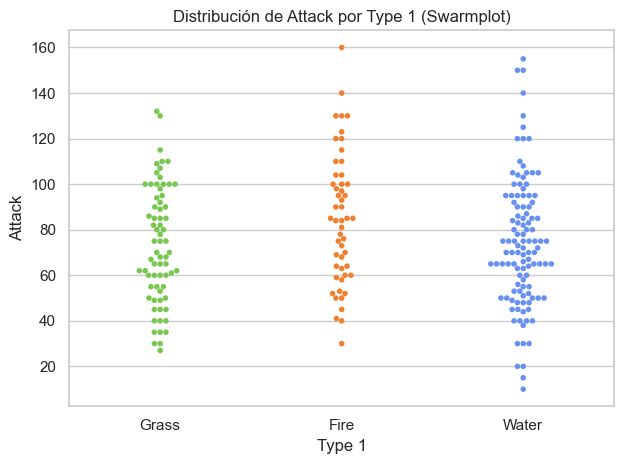

In [ ]:
sns.swarmplot(data=df_filtered, x=t1, y="Attack", order=order, palette=pal, size=4)
plt.title("Distribución de Attack por Type 1 (Swarmplot)")
plt.xlabel("Type 1"); plt.ylabel("Attack")
plt.tight_layout(); plt.show()


In [121]:
# 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. 
# Elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una transparencia de 0.9
# Pon un título con pyplot (como siempre)

In [ ]:
colors = ['#78C850', '#F08030', '#6890F0']

plt.figure(figsize=(7,5))

sns.violinplot(x='Type 1', y='Attack', data=df_filtered, palette=colors, inner=None, alpha=0.9)

sns.swarmplot(x='Type 1', y='Attack', data=df_filtered, color='k', alpha=0.7)  # puntos negros semi-transparentes

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_33156\4164063814.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type 1', y='Attack', data=df_filtered, palette=colors, inner=None, alpha=0.9)


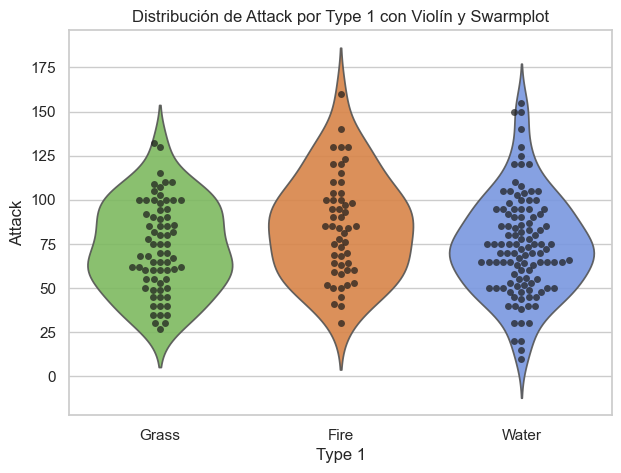

In [ ]:
plt.xlabel('Type 1')
plt.ylabel('Attack')
plt.show()

In [123]:
# 19. Veamos la función melt() de pandas. Melt toma los valores de varias columnas y los junta todos en una misma columna nueva.
# Dado un DataFrame, melt recibe varios parámetros:
# * qué columnas del DataFrame se quedan igual
# * qué nombres de columnas del dataframe pasan a ser una columna nueva
# * cómo queremos llamar esas nuevas columnas

# Primero recuerda el Dataframe df_grass_fire_water con las primeras 5 filas

In [124]:
# Mostrar las primeras 5 filas del DataFrame filtrado
df_grass_fire_water.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
t1 = next(c for c in df.columns if c.strip().lower() in {"type 1","type1","type_1"})

In [ ]:
# Grass/Fire/Water
order = ["Grass", "Fire", "Water"]
tmp = df.copy()
tmp[t1] = tmp[t1].astype(str).str.strip().str.title()
df_grass_fire_water = tmp[tmp[t1].isin(order)].copy()


df_grass_fire_water.head(5)


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [126]:
# 20. Queremos dejar igual las variables 'Name' y 'Type 1'
# Queremos añadir una columa nueva cuyos valores sean las columnas que queremos apilar y que se llame 'New Column'
# Escribimos df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=[...], var_name='New Column')

In [ ]:
id_vars = [name_col, t1]
value_vars = [c for c in df_grass_fire_water.select_dtypes("number").columns if c not in id_vars]

df_long = df_grass_fire_water.melt(
    id_vars=id_vars, value_vars=value_vars,
    var_name="New Column", value_name="Value")

df_long.head()


,Name,Type 1,New Column,Value
0,Bulbasaur,Grass,Total,318
1,Ivysaur,Grass,Total,405
2,Venusaur,Grass,Total,525
3,VenusaurMega Venusaur,Grass,Total,625
4,Charmander,Fire,Total,309


In [ ]:
id_vars = [name_col, t1]
value_vars = [c for c in df_grass_fire_water.select_dtypes("number").columns if c not in id_vars]

df_long = df_grass_fire_water.melt(
    id_vars=id_vars, value_vars=value_vars,
    var_name="New Column", value_name="Value")

df_long

,Name,Type 1,New Column,Value
0,Bulbasaur,Grass,Total,318
1,Ivysaur,Grass,Total,405
2,Venusaur,Grass,Total,525
3,VenusaurMega Venusaur,Grass,Total,625
4,Charmander,Fire,Total,309
...,...,...,...,...
1867,Skiddo,Grass,Generation,6
1868,Gogoat,Grass,Generation,6
1869,Clauncher,Water,Generation,6
1870,Clawitzer,Water,Generation,6


In [129]:
# 21. Pintamos el swarmplot con el melted y entendemos la información

c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or us

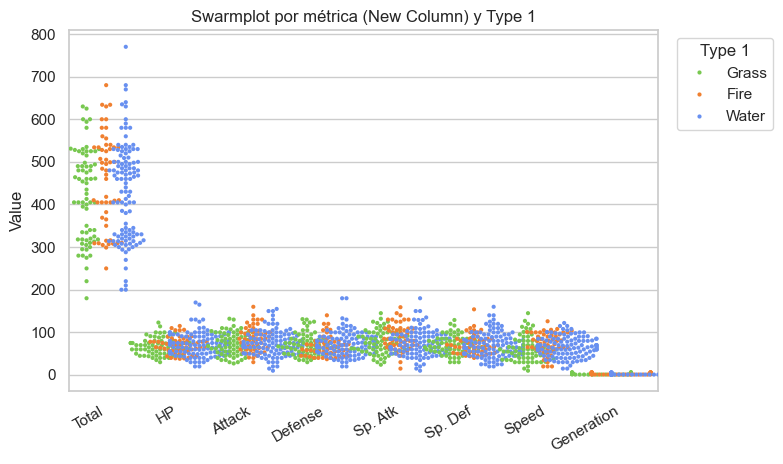

In [ ]:
sns.set_theme(style="whitegrid")

order_types = ["Grass", "Fire", "Water"]
pal = dict(zip(order_types, ['#78C850', '#F08030', '#6890F0']))

plt.figure(figsize=(8, 4.8))
sns.swarmplot(
    data=df_long,
    x="New Column", y="Value",
    hue="Type 1", hue_order=order_types, palette=pal,
    dodge=True, size=3)

plt.title("Swarmplot por métrica (New Column) y Type 1")
plt.xlabel(""); plt.ylabel("Value")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Type 1", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout(); plt.show()


c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or u

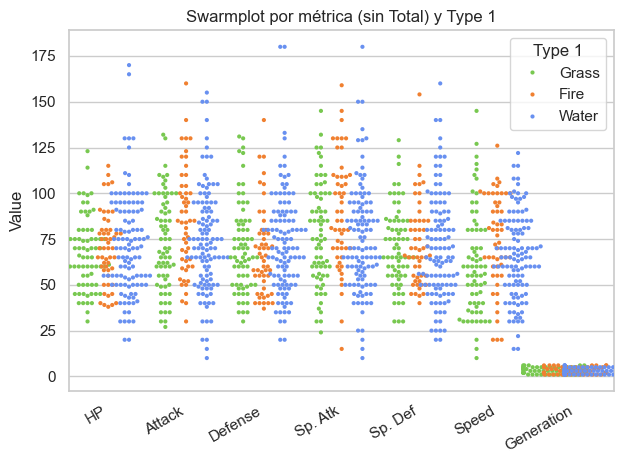

In [ ]:
df_long_nt = df_long[df_long["New Column"].astype(str).str.strip().str.casefold() != "total"]

In [133]:
# 22. Basándote en el gráfico anterior, define el tamaño de la figura en (10,6) (usa plt)
# En el swarmplot añade el argumento dodge a True y usa la anterior paleta de colores Pokemon

# Dodge en inglés es "esquivar", ¿qué diferencia ves?

# Usando plt 
# fija el límite del eje Y entre 0 y 200
# fija la leyenda con bbox_to_anchor en upper left. Pista: upper left es el código 2 y se usa el parámetro loc.


In [ ]:
order_types = ["Grass", "Fire", "Water"]
pal = dict(zip(order_types, ['#78C850', '#F08030', '#6890F0']))
hue_col = next(c for c in df_long_nt.columns if c.strip().lower() in {"type 1","type1","type_1"})

plt.figure(figsize=(10, 6))            

ax = sns.swarmplot(
    data=df_long_nt, x="New Column", y="Value",
    hue=hue_col, hue_order=order_types, palette=pal,
    dodge=True, size=3)

ax.set_ylim(0, 200)                      # límite Y [0,200]
ax.set_xlabel(""); ax.set_ylabel("Value")
plt.xticks(rotation=30, ha="right")

c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


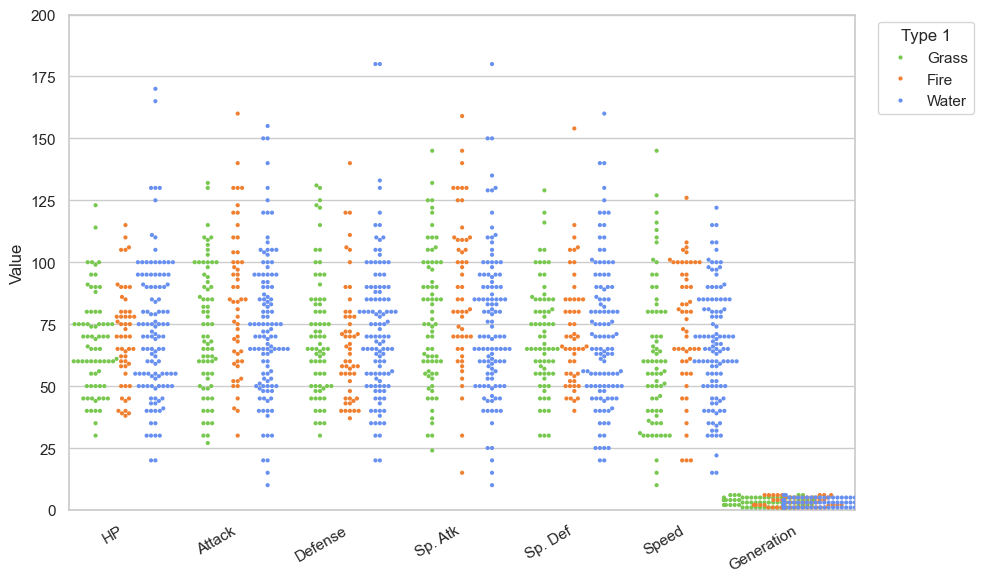

In [ ]:
plt.legend(title="Type 1", loc=2, bbox_to_anchor=(1.02, 1))
plt.tight_layout(); plt.show()


In [135]:
# Observa que incluso usando Seaborn, usamos Pyplot para trabajar con los ejes, la leyenda y el tamaño
# Lo importante es que Seaborn y Pyplot conviven bien juntos

In [136]:
# 23. Mapas de calor
# Calcula las correlaciones del primer DataFrame original df
# Pista: las correlaciones se calculan con el método corr()
# Recuerda: las correlaciones miden entre dos variables, si varío una, cuánto me varía la otra (cómo están de relacionadas)

In [ ]:
num_df = df.copy()
for c in ["Stage", "Legendary"]:
    if c in num_df.columns and not pd.api.types.is_numeric_dtype(num_df[c]):
        num_df[c] = num_df[c].astype("category").cat.codes

corr = num_df.select_dtypes(include="number").corr(method="pearson").round(6)
corr #html format


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


In [ ]:
cols = ["Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed","Stage","Legendary"]

num_df = df.copy()

In [ ]:
for c in ["Stage", "Legendary"]:
    if c in num_df.columns and not pd.api.types.is_numeric_dtype(num_df[c]):
        num_df[c] = num_df[c].astype("category").cat.codes

In [ ]:
cols_present = [c for c in cols if c in num_df.columns]
corr = num_df[cols_present].corr(method="pearson").round(6)
corr 


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


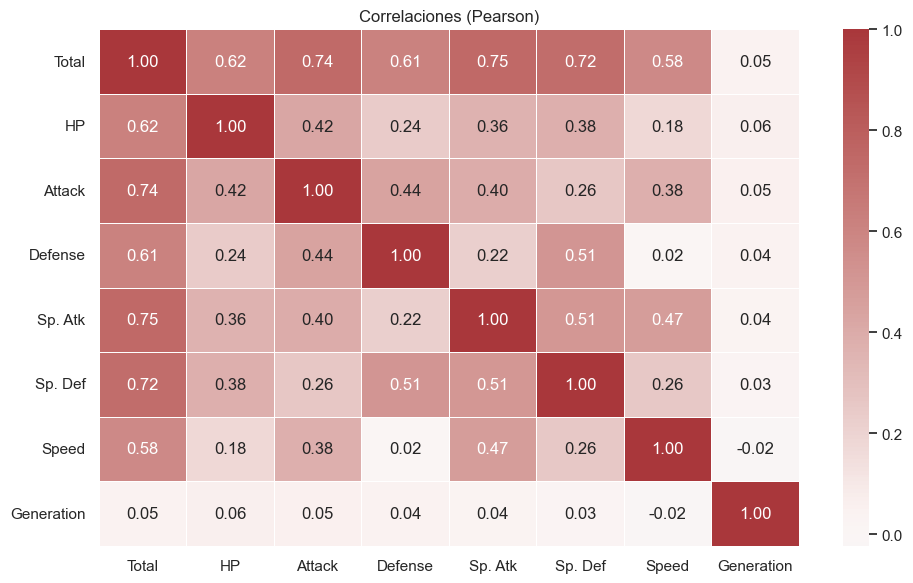

In [ ]:
corr = df.select_dtypes(include="number").corr(method="pearson")

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0, linewidths=.5)
plt.title("Correlaciones (Pearson)")
plt.tight_layout(); plt.show()


In [ ]:
# ¿la correlación entre qué valores se encuentra?
# la autocorrelación es la correlación de una variable consigo misma, ¿qué aprecias?
# Encuentra dos variables que veas que están fuertemente relacionadas según la correlación
# Si tuvieras una matriz de correlación muy grande y te cobrasen por cada dato que lees, ¿qué harías?

¿Entre qué valores está la correlación?
Entre -1 y 1.

1: relación lineal positiva perfecta.

0: sin relación lineal.

-1: relación lineal negativa perfecta.

Autocorrelación (variable consigo misma): ¿qué se aprecia?
La diagonal de la matriz es 1.00 para todas las variables (correlación perfecta consigo misma).

Dos variables fuertemente relacionadas (según tu tabla):

Total ↔ Sp. Def ≈ 0.77 (fuerte positiva).

Total ↔ Sp. Atk ≈ 0.68 (alta positiva).
(Otras son moderadas: Attack–Defense ≈ 0.49; Sp. Atk–Speed ≈ 0.41; HP–Speed ≈ -0.04 muy débil y negativa.)

Si la matriz es muy grande y me cobran por cada dato leído, haría:

Leer solo el triángulo superior (o inferior) sin la diagonal.

Filtrar por umbral (p. ej., |r| ≥ 0.5) o quedarme con el top-k por variable.

Si busco algo concreto, usar corrwith para una variable objetivo en vez de toda la matriz.

Clusterizar variables y mirar solo resúmenes por clúster (y el mapa de calor sin annot=True).

Paginar / muestrear: convertir a formato largo y consultar por partes.

¿Entre qué valores se encuentra la correlación?

La correlación se calcula entre todas las columnas numéricas del DataFrame.

Cada celda (i,j) de la matriz indica cómo varía la columna i respecto a la columna j.

Por ejemplo, la correlación entre Attack y Defense, o entre HP y Speed.

Autocorrelación:

Las celdas de la diagonal (i == j) muestran la correlación de cada columna consigo misma.

Estas siempre valen 1, porque cualquier variable está perfectamente correlacionada consigo misma.

Dos variables fuertemente relacionadas:

Mirando la matriz (o por experiencia con Pokémon), suelen ser:

Total y Attack → generalmente correlación muy alta (cerca de 1), porque Total incluye Attack.

Total y Defense → también alta correlación por la misma razón.

También se pueden observar correlaciones moderadas entre HP y Total.

Si la matriz fuera muy grande y te cobraran por cada dato leído:

Podrías no leer la matriz completa, sino:

Leer solo la diagonal (autocorrelaciones no aportan nueva información).

Leer solo las columnas de interés.

Usar máscara triangular superior o inferior (np.triu o np.tril) para evitar leer datos duplicados, ya que la matriz es simétrica.

✅ Conclusión:

La correlación nos ayuda a identificar relaciones fuertes entre variables.

La diagonal muestra autocorrelación = 1.

En matrices grandes, conviene optimizar la lectura para evitar redundancia y ahorrar recursos.

In [50]:
# 24. Pinta el histograma y la densidad de probabilidad del nivel de defensa usando el DataFrame original

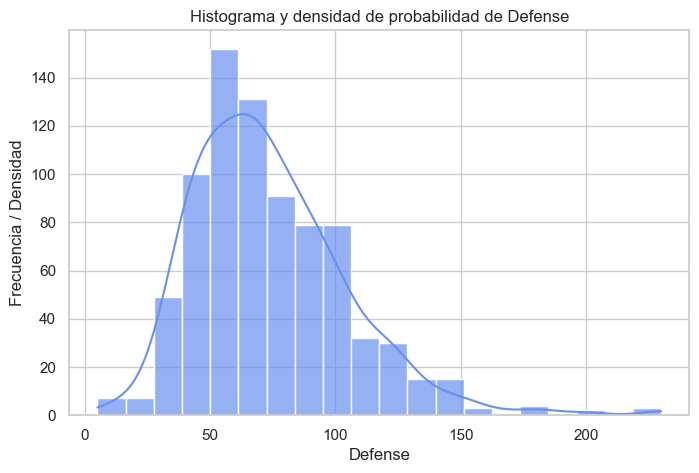

In [ ]:
plt.figure(figsize=(8,5))

sns.histplot(df['Defense'], kde=True, bins=20, color='#6890F0', alpha=0.7)

plt.title('Histograma y densidad de probabilidad de Defense')
plt.xlabel('Defense')
plt.ylabel('Frecuencia / Densidad')

plt.show()

In [52]:
# 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original
# Usa un sns.countplot
# Usa plt.xticks y gira las etiquetas

In [ ]:
plt.figure(figsize=(10,5))

In [ ]:
sns.countplot(x='Type 1', data=df, palette='Set3')

plt.xticks(rotation=45)


C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_33156\1447691159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type 1', data=df, palette='Set3')


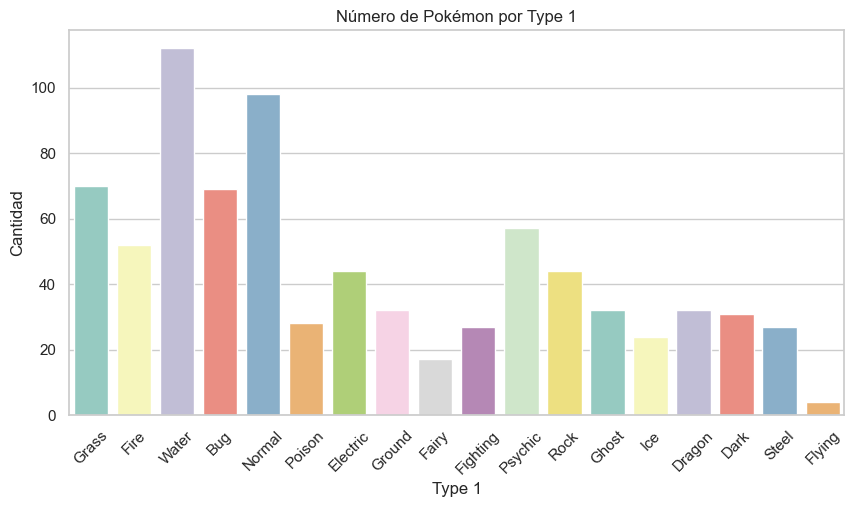

In [ ]:
plt.title('Número de Pokémon por Type 1')
plt.xlabel('Type 1')
plt.ylabel('Cantidad')

plt.show()

In [54]:
# 26. Usa catplot con el DataFrame original. Muestra el valor de Defense según el 'Type 1', muestra un subplot para legendarios y otro para no legendarios
# y divide los colores según el Type 2

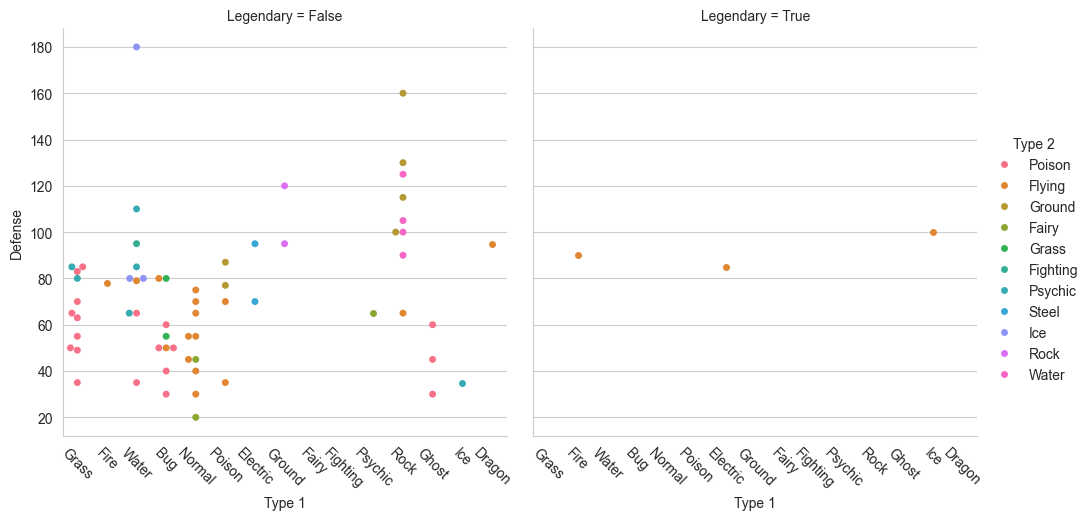

In [ ]:
sns.catplot(
    x='Type 1',
    y='Defense',
    hue='Type 2',
    col='Legendary',
    data=df,
    kind='box',
    height=5,
    aspect=1.2,
    palette='Set2')

In [56]:
# 27. Muestra una función distribución de probabilidad con kdeplot (curvas de nivel) de la defensa respecto al ataque.
# Di un bin 2D donde caigan muchos puntos (ataque, defensa).

In [ ]:
plt.figure(figsize=(8,6))

sns.kdeplot(
    x=df['Attack'],
    y=df['Defense'],
    fill=True,       
    cmap='Reds',     
    thresh=0,        
    levels=10,       
    alpha=0.7)

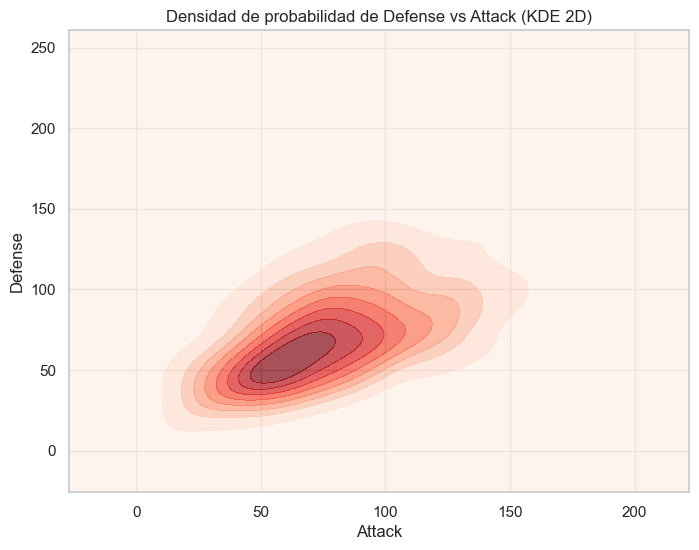

In [ ]:
plt.title('Densidad de probabilidad de Defense vs Attack (KDE 2D)')
plt.xlabel('Attack')
plt.ylabel('Defense')

plt.show()

In [58]:
# 29. Pinta una distribución de probabilidad conjunta, pintando la defensa respecto al ataque del DataFrame original

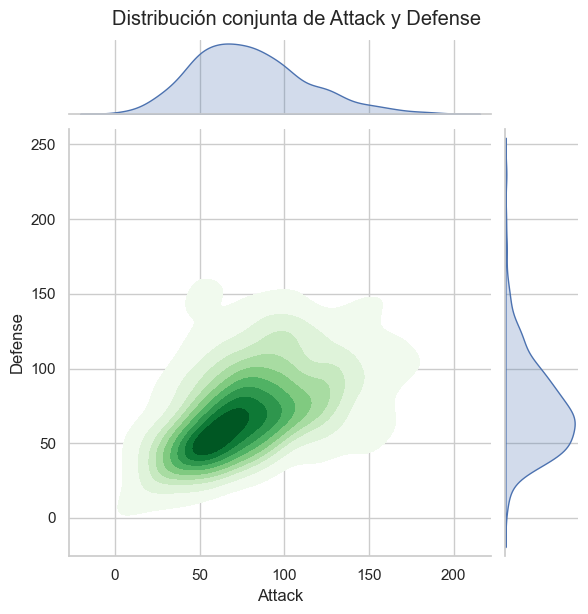

In [143]:
sns.jointplot(
    x='Attack',
    y='Defense',
    data=df,
    kind='kde',      
    fill=True,       
    cmap='Greens')      

plt.suptitle('Distribución conjunta de Attack y Defense', y=1.02)
plt.show()